# Gene Ontology (GO) analysis

## 0 Introduction
Epigenetic factors, such as presence of specific nutrients, have a significant influence in the metabolic activiy of the fungal cells in order to ensure adaptability and survival in different environmental conditions. Therefore, the variation observed in the peptide abundance of the cells growrn in two different media compositions was an expected outcome. Minimal media (MM) contains minimal amount of nutrients required for the cell growth, whereas Minimal media with nitrogen (MM + Nitrogen) contains the same composition but with the presence of additional nitrogen. Hence, this notebook is dedicated to carry out Gene Ontology (GO) analysis to investigathe the influence of nitrogen presence through analyzing the top 20 accessions that showed the highest peptide abundance under two different media compositions.

### Agenda
- Generate a lits of accessions which showed the highest peptide abundance in different media compositions
- Create a text files of the accession lists
- Upload the text files into UniProt and obtain the GO terms for molecular function (GO analysis)
- (if present) Carry out manual research of the undetected accessions
- Illustrate the GO difference determined between two media compositions


In [1]:
import re
import pandas as pd
from matplotlib import pyplot as plt

## 1 Accession lists

In [2]:
# Load the data generated from the previous notebook '01-Proteomics_data_analysis'
df_proteomics_mean_peptide_abundances = pd.read_csv('../Data/05_Data_analysis_signal_peptides/proteomics_mean_peptide_abundances.csv')
df_proteomics_mean_peptide_abundances

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized)
0,AO090003000935,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923
1,AO090023000944,250.433333,0.044270,53.733333,0.044270,2.632887e+08,0.025062,7.327970e+07,0.017628
2,AO090003001591,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000
3,AO090005001300,50.566667,0.080759,94.433333,0.080759,3.997800e+07,0.003882,9.707511e+07,0.024045
4,AO090010000746,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331
...,...,...,...,...,...,...,...,...,...
860,AO090001000075,110.200000,0.254802,310.600000,0.254802,1.013201e+05,0.000010,3.909362e+05,0.000090
861,AO090005001355,105.400000,0.122683,184.200000,0.122683,3.984604e+04,0.000003,9.575187e+04,0.000015
862,AO090003000247,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
863,AO090001000680,0.000000,0.309596,389.333333,0.309596,0.000000e+00,0.000000,9.818556e+04,0.000019


In [3]:
# Isolate the signal peptides observed in different media
df_peptides_MM = df_proteomics_mean_peptide_abundances[['Accession', 'MM mean abundances (Raw)']]
df_peptides_MM_N = df_proteomics_mean_peptide_abundances[['Accession', 'MM + Nitrogen mean abundances (Raw)']]

# Drop the rows with NaN values
df_peptides_MM = df_peptides_MM.dropna()
df_peptides_MM_N = df_peptides_MM_N.dropna()

# Sort the accessions with descending order of peptide abundances
df_peptides_MM = df_peptides_MM.sort_values(by=['MM mean abundances (Raw)'], ascending=False)
df_peptides_MM_N = df_peptides_MM_N.sort_values(by=['MM + Nitrogen mean abundances (Raw)'], ascending=False)

In [4]:
df_peptides_MM


,Accession,MM mean abundances (Raw)
2,AO090003001591,1.047763e+10
22,AO090011000046,1.206998e+09
4,AO090010000746,2.719032e+08
1,AO090023000944,2.632887e+08
7,AO090005001090,2.068820e+08
...,...,...
309,AO090011000764,0.000000e+00
608,AO090020000703,0.000000e+00
606,AO090020000540,0.000000e+00
605,AO090010000225,0.000000e+00


In [5]:
# Select first 20 accessions and remove '-T-p1' to ensure identification by the web platforms
df_top20_MM = df_peptides_MM['Accession'].iloc[:20].str.replace('-T-p1', '')
df_top20_MM_N = df_peptides_MM_N['Accession'].iloc[:20].str.replace('-T-p1', '')

In [6]:
df_top20_MM

2      AO090003001591
22     AO090011000046
4      AO090010000746
1      AO090023000944
7      AO090005001090
43     AO090023000905
16     AO090038000279
31     AO090701001051
0      AO090003000935
24     AO090011000119
143    AO090009000553
178    AO090701000295
8      AO090003001036
13     AO090001000635
48     AO090005000409
26     AO090009000144
33     AO090005001044
55     AO090009000117
52     AO090003000321
3      AO090005001300
Name: Accession, dtype: object

In [7]:
# Save the results as text file
df_top20_MM.to_csv('../Data/06_Gene_ontology_analysis/top20_MM_accessions.txt', sep='\t', index=False, header=False)
df_top20_MM_N.to_csv('../Data/06_Gene_ontology_analysis/top20_MM_N_accessions.txt', sep='\t', index=False, header=False)

## 2 GO analysis
Upload the resulting Accession list to UniProt for analysis and determine the Gene Ontology (molecular function) for the accessions identified by the UniProt. Download the analysis results in CSV format.

In [8]:
# Load the results obtained for gene ontology analysis
df_top20_MM_uniprot = pd.read_csv('../Data/06_Gene_ontology_analysis/uniprot_top20_proteomics_MM.txt', sep='\t')
df_top20_MM_N_uniprot = pd.read_csv('../Data/06_Gene_ontology_analysis/uniprot_top20_proteomics_MM_N.txt', sep='\t')

In [9]:
df_top20_MM_N_uniprot

,From,Entry,Protein names,Gene Ontology (molecular function)
0,AO090003001591,P0C1B4,"Alpha-amylase A type-1/2 (EC 3.2.1.1) (1,4-alp...",alpha-amylase activity
1,AO090003000935,Q2UK66,VCBS repeat-containing protein,NaN
2,AO090103000076,Q2TYW9,PDGF_2 domain-containing protein,growth factor activity [GO:0008083]
3,AO090026000003,Q2UG11,Beta-cyclopiazonate dehydrogenase (EC 1.21.99....,beta-cyclopiazonate dehydrogenase activity [GO...
4,AO090010000746,P36914,"Glucoamylase (EC 3.2.1.3) (1,4-alpha-D-glucan ...","glucan 1,4-alpha-glucosidase activity [GO:0004..."
5,AO090701001051,NaN,NaN,NaN
6,AO090011000046,Q2U1F7,Peptidase A1 domain-containing protein,3-oxoacyl-[acyl-carrier-protein] reductase (NA...
7,AO090023000804,Q2UGK8,Hydrophobic surface binding protein A-domain-c...,NaN
8,AO090011000119,Q2U193,Hydrophobic surface binding protein A-domain-c...,NaN
9,AO090701000295,Q2U8T9,Uncharacterized protein,NaN


Merge the GO analysis results with the dataframes of signal peptides observed at different media compositions to combine all the GO terms and peptide abundances in a single dataframe

In [10]:
# First, change the column name to Accession in order to allow dataframe match
df_top20_MM_uniprot = df_top20_MM_uniprot.rename(columns={'From': 'Accession'})
df_top20_MM_N_uniprot = df_top20_MM_N_uniprot.rename(columns={'From': 'Accession'})

# Second, replace the '-T-p1' with '' in the accession numbers to allow match with the GO dataframes
df_peptides_MM['Accession'] = df_peptides_MM['Accession'].str.replace('-T-p1', '')
df_peptides_MM_N['Accession'] = df_peptides_MM_N['Accession'].str.replace('-T-p1', '')

# Merge the dataframes
df_top20_MM_uniprot_abundances = pd.merge(df_peptides_MM[['Accession', 'MM mean abundances (Raw)']], df_top20_MM_uniprot, on='Accession')
df_top20_MM_N_uniprot_abundances = pd.merge(df_peptides_MM_N[['Accession', 'MM + Nitrogen mean abundances (Raw)']], df_top20_MM_N_uniprot, on='Accession')

In [11]:
df_top20_MM_uniprot_abundances

,Accession,MM mean abundances (Raw),Entry,Protein names,Gene Ontology (molecular function)
0,AO090003001591,1.047763e+10,P0C1B4,"Alpha-amylase A type-1/2 (EC 3.2.1.1) (1,4-alp...",alpha-amylase activity
1,AO090011000046,1.206998e+09,Q2U1F7,Peptidase A1 domain-containing protein,3-oxoacyl-[acyl-carrier-protein] reductase (NA...
2,AO090010000746,2.719032e+08,P36914,"Glucoamylase (EC 3.2.1.3) (1,4-alpha-D-glucan ...","glucan 1,4-alpha-glucosidase activity [GO:0004..."
3,AO090023000944,2.632887e+08,P0C1B3,"Alpha-amylase A type-1/2 (EC 3.2.1.1) (1,4-alp...",alpha-amylase activity [GO:0004556]; calcium i...
4,AO090005001090,2.068820e+08,Q2UQV1,Glycosidase (EC 3.2.-.-),"hydrolase activity, hydrolyzing O-glycosyl com..."
5,AO090023000905,1.906292e+08,Q2UGB5,Protein ecm33,NaN
6,AO090038000279,1.372809e+08,Q2U2X7,"Probable glucan endo-1,3-beta-glucosidase eglC...","hydrolase activity, hydrolyzing O-glycosyl com..."
7,AO090701001051,1.209383e+08,NaN,NaN,NaN
8,AO090003000935,1.066262e+08,Q2UK66,VCBS repeat-containing protein,NaN
9,AO090011000119,9.799470e+07,Q2U193,Hydrophobic surface binding protein A-domain-c...,NaN


The GO variables are too complex to represent. Define a function which will either output the words before + activity/binding or None depending on the presence or absence of the terms 'activity' or 'binding' variables, respectively.

In [12]:
def extract_activity(text):
    if text == text:
        # search for 'activity' or 'binding' in the variables
        activity_match = re.search(r'\b(\w+\s)*\w+(?=\s+activity)', text)
        binding_match = re.search(r'\b(\w+\s)*\w+(?=\s+binding)', text)
        
        if activity_match:
            # if activity found, extract word and add 'activity'
            return activity_match.group(0) + ' activity'
        elif binding_match:
            # if binding found, extract word and add 'binding'
            return binding_match.group(0) + ' binding'
    else:
        # if text is NaN, return None
        return None

In [13]:
# Apply the function to the column
df_top20_MM_uniprot_abundances['Enzyme activity'] = df_top20_MM_uniprot_abundances['Gene Ontology (molecular function)'].apply(extract_activity)
df_top20_MM_N_uniprot_abundances['Enzyme activity'] = df_top20_MM_N_uniprot_abundances['Gene Ontology (molecular function)'].apply(extract_activity)

### 2.1 Visualization of GO analysis

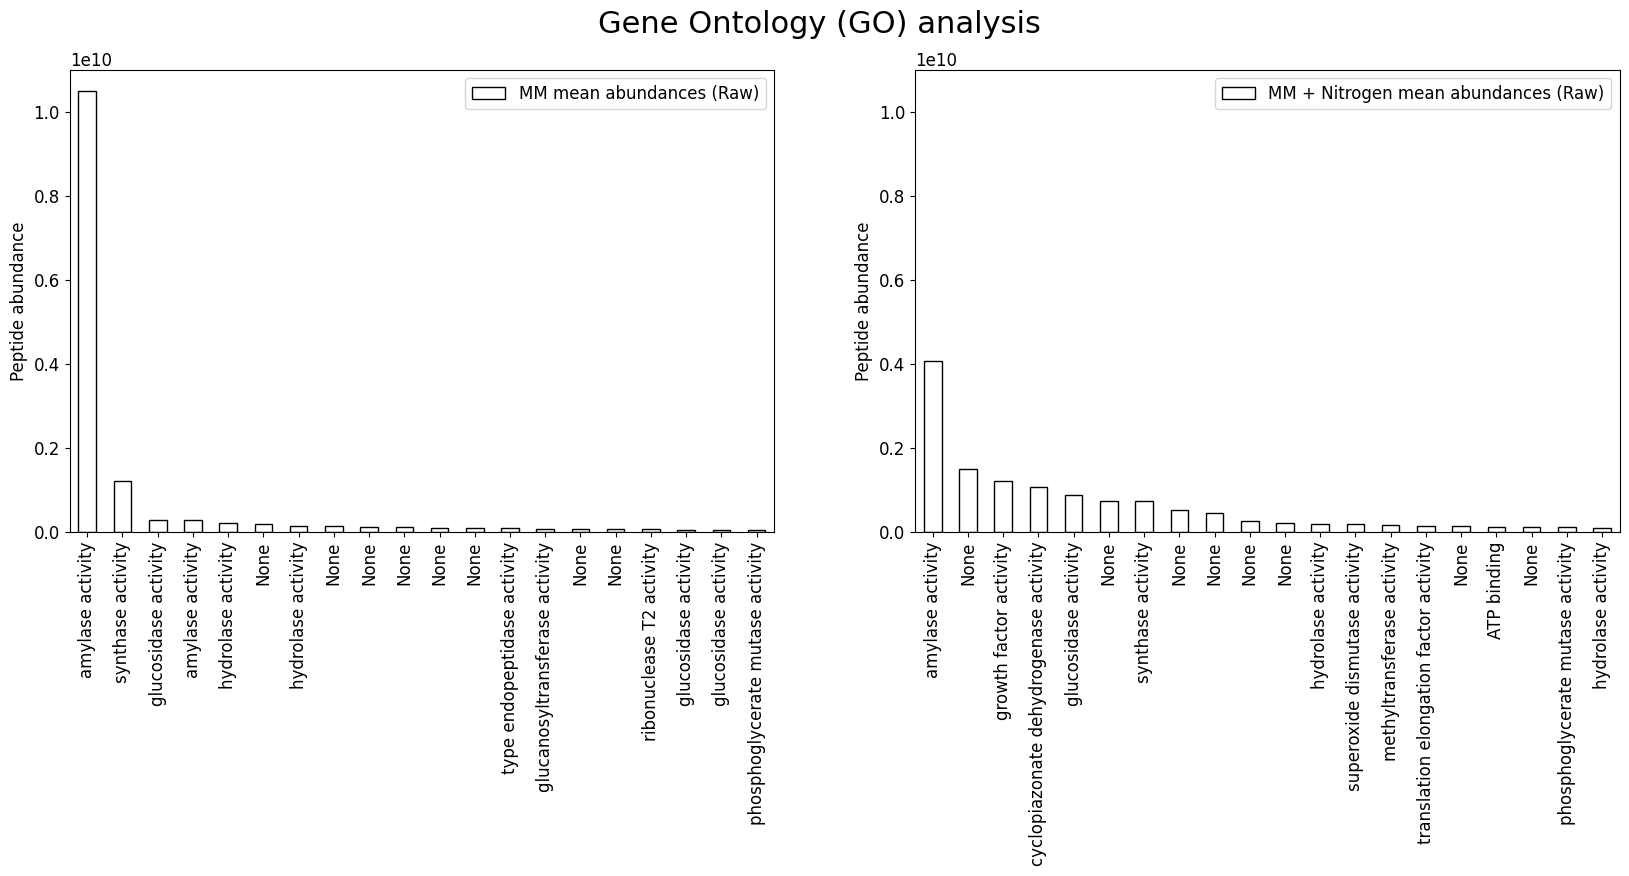

In [14]:
# Set the font size
plt.rc('font', size=12)

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Gene Ontology (GO) analysis', fontsize=22)

# Left subplot
df_top20_MM_uniprot_abundances.plot(x='Enzyme activity', y='MM mean abundances (Raw)', kind='bar', color='white', edgecolor='black', ax=axs[0])
axs[0].set_ylim(0, 1.1e10)
axs[0].set_xlabel('')
axs[0].set_ylabel('Peptide abundance')

# Right subplot
df_top20_MM_N_uniprot_abundances.plot(x='Enzyme activity', y='MM + Nitrogen mean abundances (Raw)', kind='bar' , color='white', edgecolor='black', ax=axs[1])
axs[1].set_ylim(0, 1.1e10)
axs[1].set_xlabel('')
axs[1].set_ylabel('Peptide abundance')

plt.show()


Lets prob the GO terms that could not determined (None)

In [15]:
# Remove the None values
df_top20_MM_uniprot_abundances = df_top20_MM_uniprot_abundances.dropna()
df_top20_MM_N_uniprot_abundances = df_top20_MM_N_uniprot_abundances.dropna()

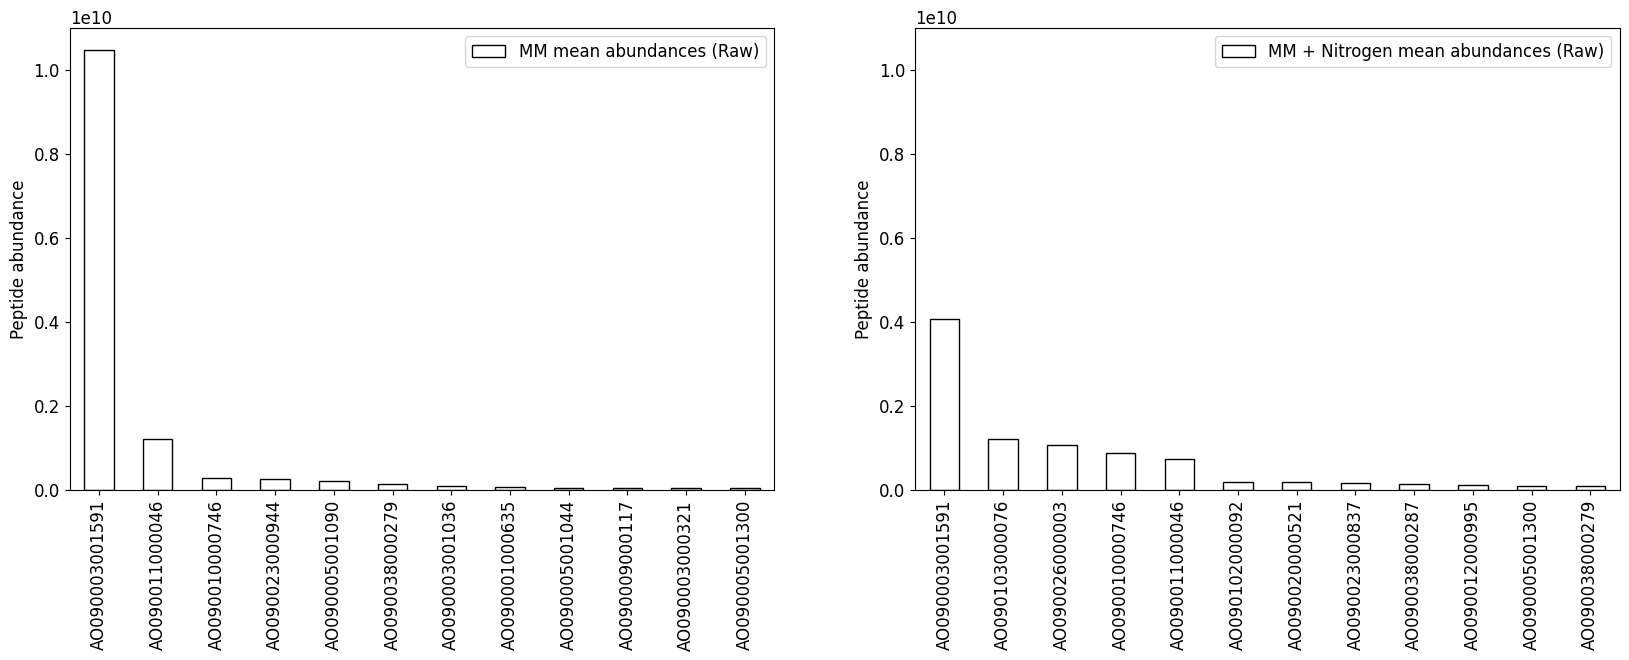

In [16]:
# Set the font size
plt.rc('font', size=12)

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Left subplot
df_top20_MM_uniprot_abundances.plot(x='Accession', y='MM mean abundances (Raw)', kind='bar', color='white', edgecolor='black', ax=axs[0])
axs[0].set_ylim(0, 1.1e10)
axs[0].set_xlabel('')
axs[0].set_ylabel('Peptide abundance')

# Right subplot
df_top20_MM_N_uniprot_abundances.plot(x='Accession', y='MM + Nitrogen mean abundances (Raw)', kind='bar' , color='white', edgecolor='black', ax=axs[1])
axs[1].set_ylim(0, 1.1e10)
axs[1].set_xlabel('')
axs[1].set_ylabel('Peptide abundance')

plt.show()

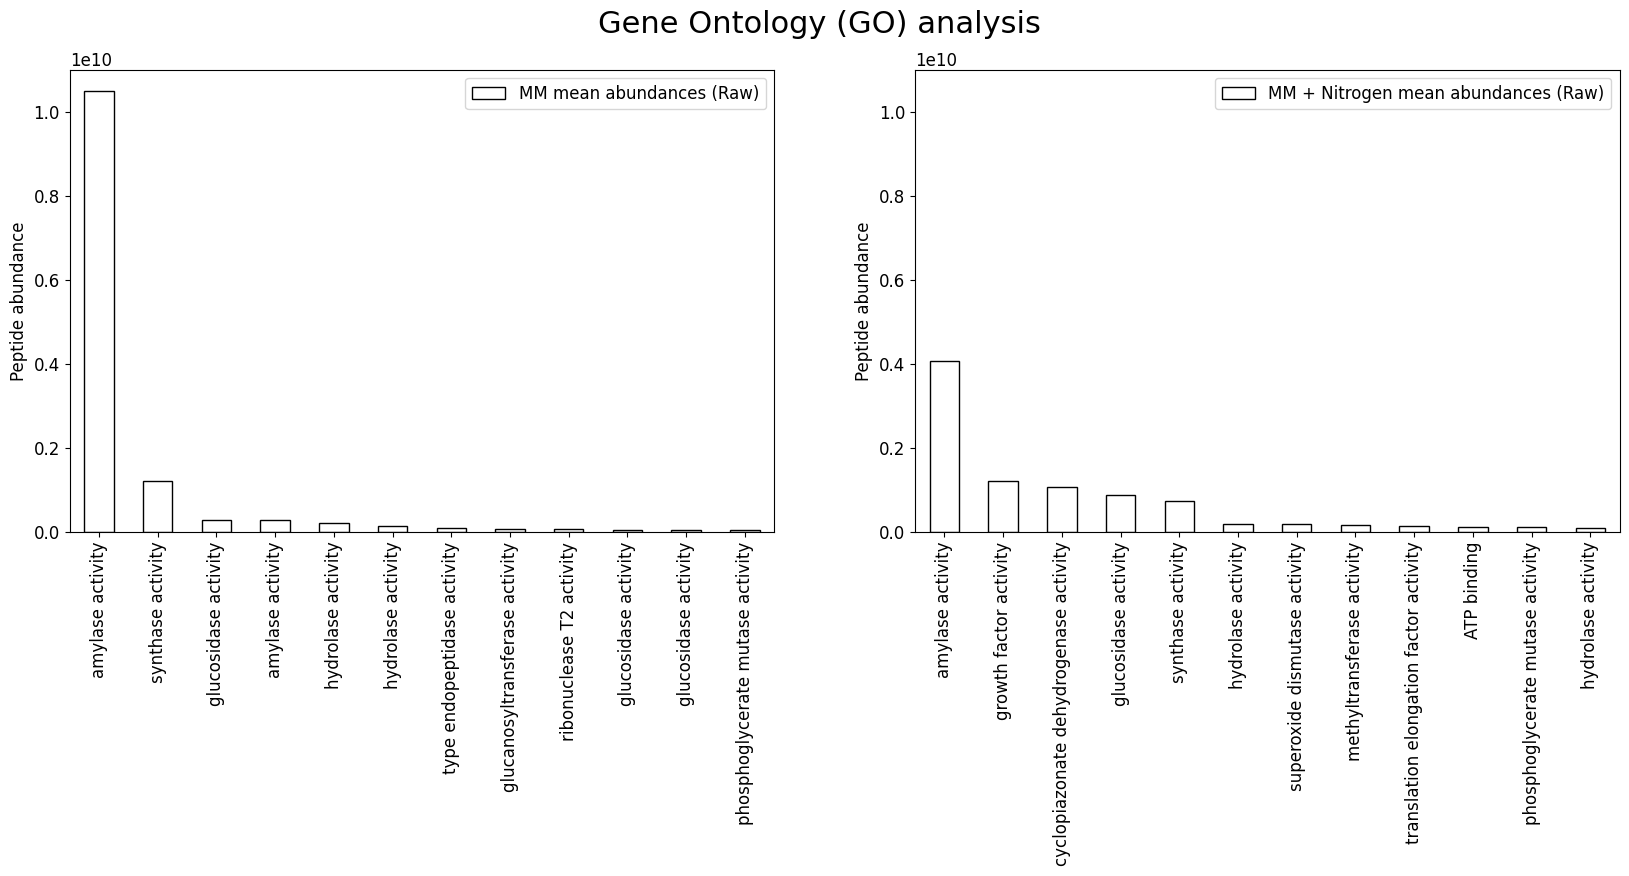

In [17]:
# Set the font size
plt.rc('font', size=12)

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Gene Ontology (GO) analysis', fontsize=22)

# Left subplot
df_top20_MM_uniprot_abundances.plot(x='Enzyme activity', y='MM mean abundances (Raw)', kind='bar', color='white', edgecolor='black', ax=axs[0])
axs[0].set_ylim(0, 1.1e10)
axs[0].set_xlabel('')
axs[0].set_ylabel('Peptide abundance')

# Right subplot
df_top20_MM_N_uniprot_abundances.plot(x='Enzyme activity', y='MM + Nitrogen mean abundances (Raw)', kind='bar' , color='white', edgecolor='black', ax=axs[1])
axs[1].set_ylim(0, 1.1e10)
axs[1].set_xlabel('')
axs[1].set_ylabel('Peptide abundance')

plt.show()


Lets colour the bars/enzyme activities which were obsered only in one of the media compositions in order to emphasize the influence of Nitrogen addition

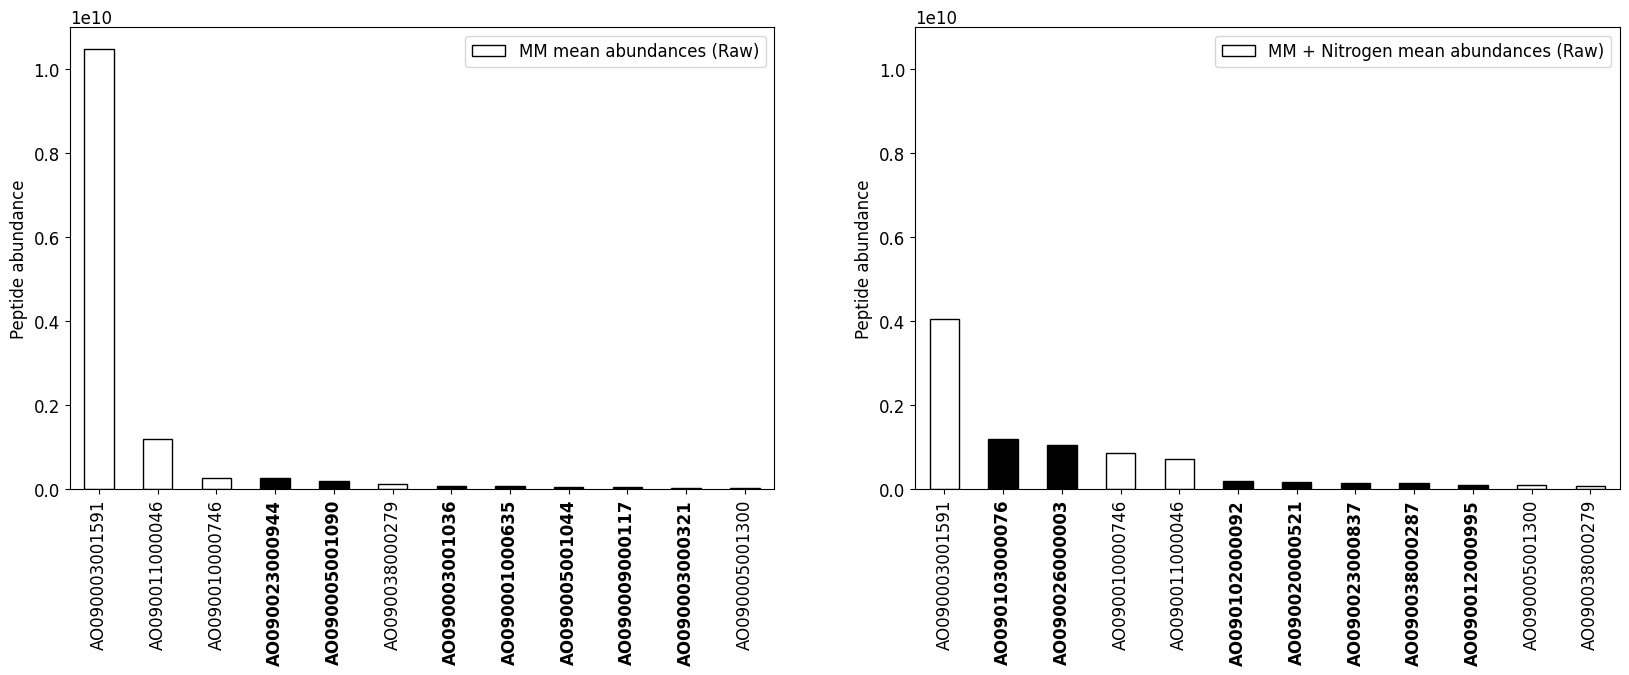

In [34]:
# Set the font size 
plt.rc('font', size=12)
fig.suptitle('Gene Ontology (GO) analysis', fontsize=22)

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df_MM_uniprot = df_top20_MM_uniprot_abundances['Accession'].tolist()
df_MM_N_uniprot = df_top20_MM_N_uniprot_abundances['Accession'].tolist()

unique_MM_uniprot = list(set(df_MM_uniprot) - set(df_MM_N_uniprot))
unique_MM_N_uniprot = list(set(df_MM_N_uniprot) - set(df_MM_uniprot))

# Left subplot
df_top20_MM_uniprot_abundances.plot(x='Accession', y='MM mean abundances (Raw)', kind='bar', color='white', edgecolor='black', ax=axs[0])
axs[0].set_ylim(0, 1.1e10)
axs[0].set_xlabel('')
axs[0].set_ylabel('Peptide abundance')

# Color bars that are only present in one dataframe
for i, label in enumerate(axs[0].get_xticklabels()):
    if label.get_text() in unique_MM_uniprot:
        axs[0].patches[i].set_facecolor('black') # Color bars into black
        label.set_weight('bold') # Make x ticks bolder

# Right subplot
df_top20_MM_N_uniprot_abundances.plot(x='Accession', y='MM + Nitrogen mean abundances (Raw)', kind='bar' , color='white', edgecolor='black', ax=axs[1])
axs[1].set_ylim(0, 1.1e10)
axs[1].set_xlabel('')
axs[1].set_ylabel('Peptide abundance')

# Color bars that are only present in one dataframe 
for i, label in enumerate(axs[1].get_xticklabels()):
    if label.get_text() in unique_MM_N_uniprot:
        axs[1].patches[i].set_facecolor('black') # Color bars into black
        label.set_weight('bold') # Make x ticks bolder

plt.show()


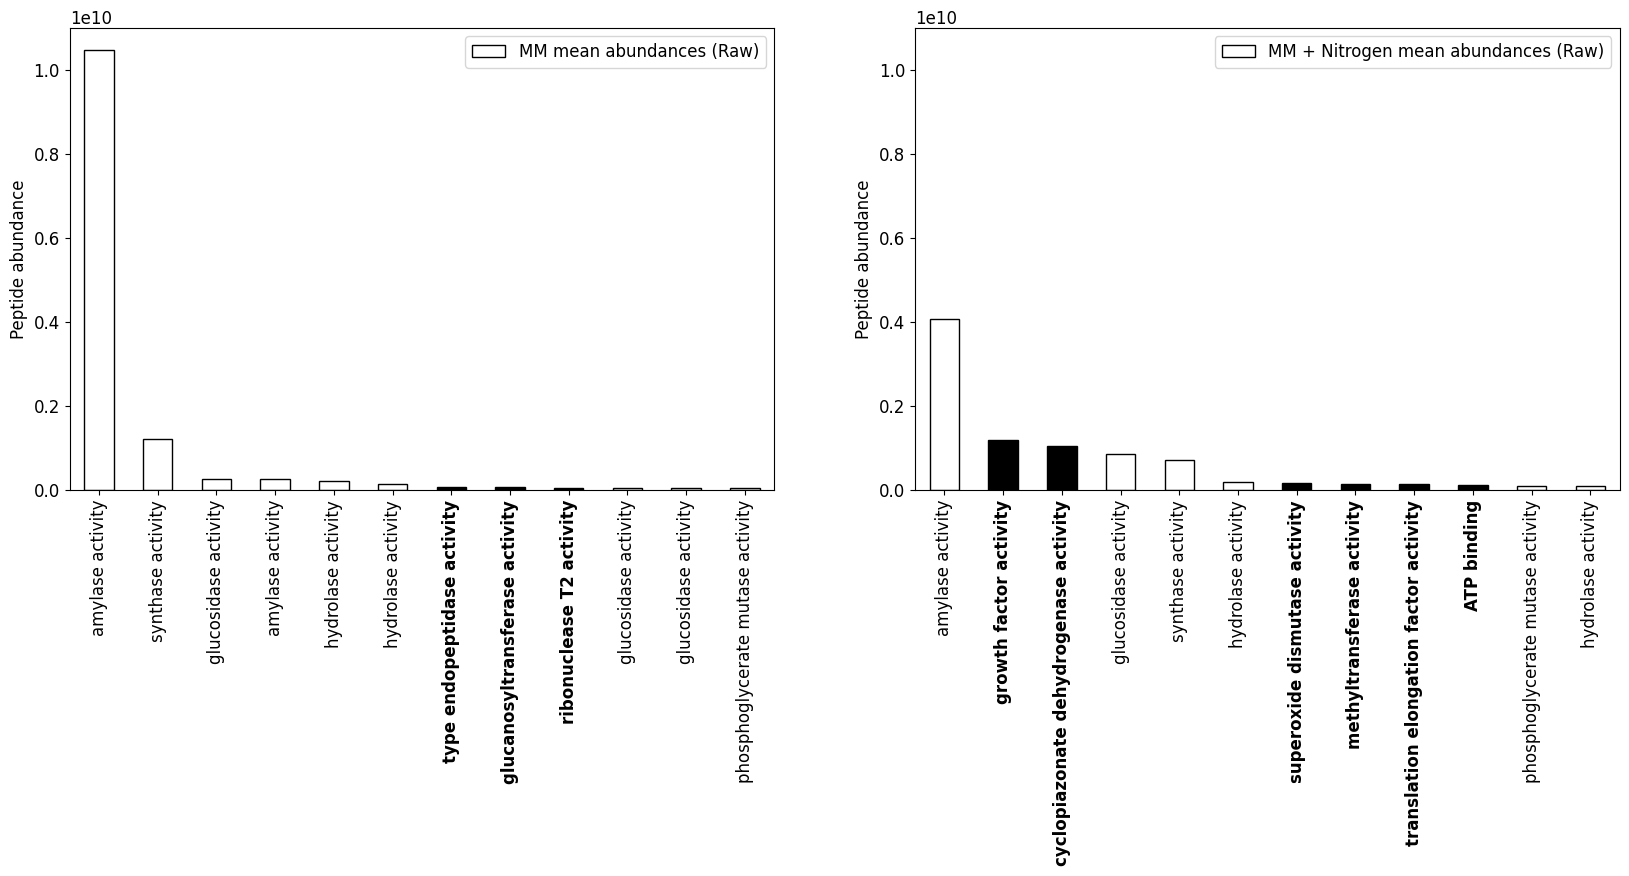

In [35]:
# Set the font size 
plt.rc('font', size=12)
fig.suptitle('Gene Ontology (GO) analysis', fontsize=22)

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df_MM_uniprot = df_top20_MM_uniprot_abundances['Enzyme activity'].tolist()
df_MM_N_uniprot = df_top20_MM_N_uniprot_abundances['Enzyme activity'].tolist()

unique_MM_uniprot = list(set(df_MM_uniprot) - set(df_MM_N_uniprot))
unique_MM_N_uniprot = list(set(df_MM_N_uniprot) - set(df_MM_uniprot))

# Left subplot
df_top20_MM_uniprot_abundances.plot(x='Enzyme activity', y='MM mean abundances (Raw)', kind='bar', color='white', edgecolor='black', ax=axs[0])
axs[0].set_ylim(0, 1.1e10)
axs[0].set_xlabel('')
axs[0].set_ylabel('Peptide abundance')

# Color bars that are only present in one dataframe
for i, label in enumerate(axs[0].get_xticklabels()):
    if label.get_text() in unique_MM_uniprot:
        axs[0].patches[i].set_facecolor('black') # Color bars into black
        label.set_weight('bold') # Make x ticks bolder

# Right subplot
df_top20_MM_N_uniprot_abundances.plot(x='Enzyme activity', y='MM + Nitrogen mean abundances (Raw)', kind='bar' , color='white', edgecolor='black', ax=axs[1])
axs[1].set_ylim(0, 1.1e10)
axs[1].set_xlabel('')
axs[1].set_ylabel('Peptide abundance')

# Color bars that are only present in one dataframe 
for i, label in enumerate(axs[1].get_xticklabels()):
    if label.get_text() in unique_MM_N_uniprot:
        axs[1].patches[i].set_facecolor('black') # Color bars into black
        label.set_weight('bold') # Make x ticks bolder

plt.show()
